In [1]:
import os
import time

import h5py
import numpy as np

import matplotlib.pyplot as plt
import IPython.display as disp

from dataproc.dataproc import get_worm_data_files, explore_worm_files

In [2]:
# Path to the folder containing all the downloaded worm data subfolders with HDF5's.

data_path = "./data_01/data"

In [3]:
main_file, feature_file, containing_dir_name = next(get_worm_data_files(data_path))

In [4]:
# explore_worm_files(main_file, feature_file, show_frame_count=1)

In [5]:
def explore_feature_file(feature_file):
    
    with h5py.File(feature_file, "r") as f:
        
        for k in f.keys():

            print("{}:".format(k))
            is_group = isinstance(f[k], h5py.Group)

            if is_group:
                print(list(f[k].keys()))

            else:  # ==> is dataset.
                dset = f[k]
                print(dset.shape)
                print(dset.dtype)
                print("ATTRS:\n{}".format(list(dset.attrs)))

            print("---")

In [6]:
# explore_feature_file(feature_file)

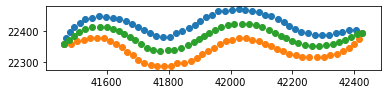

19.0


In [8]:
with h5py.File(feature_file, "r") as f:
    
    dc = f["coordinates"]["dorsal_contours"]
    vc = f["coordinates"]["ventral_contours"]
    sk = f["coordinates"]["skeletons"]
    
    skid = f["features_timeseries"]["skeleton_id"]
    
    print("Missing: ", (skid == -1).sum(), "/", skid.shape[0])
    time.sleep(3)
          
    for t in range(20):

        x_dc = dc[t, :, 0]
        y_dc = dc[t, :, 1]
        plt.scatter(x_dc, y_dc)

        x_vc = vc[t, :, 0]
        y_vc = vc[t, :, 1]
        plt.scatter(x_vc, y_vc)
        
        x_sk = sk[t, :, 0]
        y_sk = sk[t, :, 1]
        plt.scatter(x_sk, y_sk)

        ax = plt.gca()
        ax.set_aspect("equal")
        
        disp.display(plt.gcf())
        
        time.sleep(0.1)
        
        assert skid.shape[0] == dc.shape[0]
        
        print(skid[t])
        if skid[t] == -1:
            print("MISSING!")
        
        disp.clear_output(wait=True)
        plt.close()
    